# Exploratory Data Analysis and Linear Model

## Connecting to the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import DF

## Import a data and explore it

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('', index_col=0 )

In [4]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Preply/Mariia/Data/advertisment2.csv', index_col=0 )

In [6]:
df2.head()

,Television,radio,newspaper,sales
173,19.6,20.1,17.0,7.6
174,168.4,7.1,12.8,11.7
175,222.4,3.4,13.1,11.5
176,276.9,48.9,41.8,27.0
177,248.4,30.2,20.3,20.2


In [8]:
df2 = df2.rename(columns={'Television': 'TV'})

In [9]:
df3= pd.concat([df,df2],axis=0)

In [10]:
df3.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [22]:
df3.reset_index(drop=True, inplace= True)

In [24]:
df3.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
df3.tail()

,TV,radio,newspaper,sales
180,177.0,9.3,6.4,12.8
181,283.6,42.0,66.2,25.5
182,232.1,8.6,8.7,13.4
183,232.1,8.6,8.7,13.4
184,232.1,8.6,8.7,13.4


## Null Values

In [27]:
null_index= df3['sales'].isnull()

In [28]:
df3[null_index]

,TV,radio,newspaper,sales


In [13]:
#df3.dropna(inplace=True)
#df3.fillna(df3['sales'].mean(), inplace=True)
df3.fillna(df3['sales'].median(), inplace=True)

In [14]:
df3[null_index]

,TV,radio,newspaper,sales
33,97.2,1.5,30.0,12.9
56,198.9,49.4,60.0,12.9


## Duplicates

Checking the total value of duplicates

In [29]:
df3.duplicated().sum()

2

Getting the duplicates index

In [31]:
duplicates = df3.duplicated()

In [32]:
df3[duplicates]

,TV,radio,newspaper,sales
183,232.1,8.6,8.7,13.4
184,232.1,8.6,8.7,13.4


Dropping the duplicates

In [33]:
df3.drop_duplicates(keep='first',inplace=True) #df3.drop_duplicates(subset='EMP',keep='first',inplace=True) in this case you say check in EMP column and drop

In [34]:
df3.duplicated().sum()

0

## EDA (Exploratory Data Analysis) and Data Visualization

In [36]:
import numpy as np #For numeric operations
import pandas as pd #For operations on datasets
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #For visualization

Technical Information about dataset

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         183 non-null    float64
 1   radio      183 non-null    float64
 2   newspaper  183 non-null    float64
 3   sales      183 non-null    float64
dtypes: float64(4)
memory usage: 7.1 KB


Statistical Information About Dataset

In [39]:
df3.describe()

,TV,radio,newspaper,sales
count,183.000000,183.000000,183.000000,183.000000
mean,148.178142,23.522951,30.472678,14.145355
std,86.327735,14.994450,21.821222,5.249267
min,0.700000,0.000000,0.300000,1.600000
25%,74.050000,9.750000,12.700000,10.450000
50%,149.700000,24.000000,25.900000,12.900000
75%,220.400000,36.550000,43.800000,17.800000
max,296.400000,49.600000,114.000000,27.000000


What is the allocation of the budget throughout the channels (TV, Radio, Newspaper)

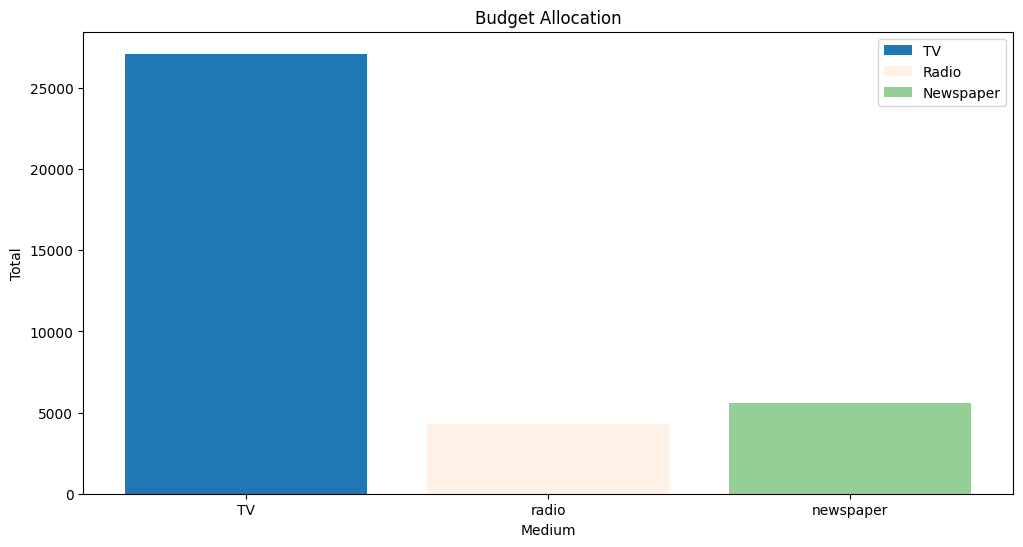

In [40]:
plt.figure(figsize=(12, 6)) #Aestethic
plt.bar('TV', df3[['TV']].sum(), label='TV') #Setting the bars
plt.bar('radio', df3[['radio']].sum(), label='Radio', alpha= 0.1) #Alpha stands for transparency
plt.bar('newspaper', df3[['newspaper']].sum(), label='Newspaper', alpha= 0.5)
plt.xlabel('Medium') #Horizontal
plt.ylabel('Total') #vertical
plt.legend() #Is the legend of the variables at corner
plt.title('Budget Allocation') #Title of the graph
plt.show() #Showing

Visualizing it on linegraphs

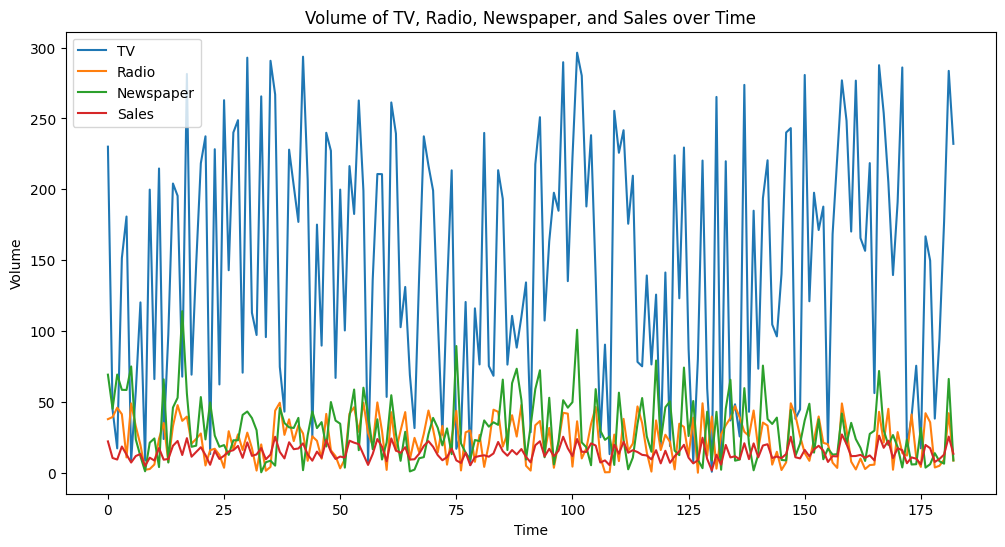

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df3.index, df3['TV'], label='TV')
plt.plot(df3.index, df3['radio'], label='Radio')
plt.plot(df3.index, df3['newspaper'], label='Newspaper')
plt.plot(df3.index, df3['sales'], label='Sales')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.title('Volume of TV, Radio, Newspaper, and Sales over Time')
plt.show()

Nicer visualization

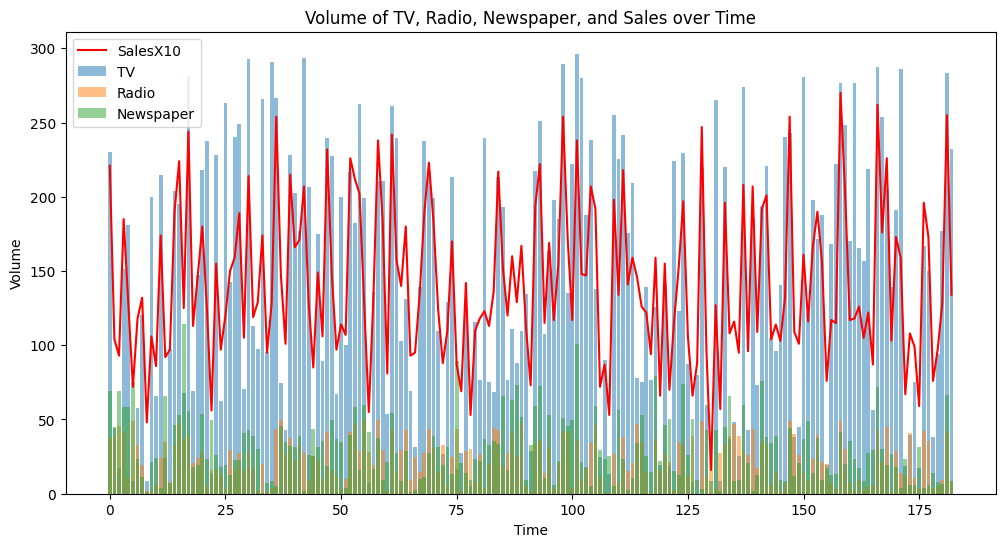

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(df3.index, df3['TV'], label='TV', alpha= 0.5)
plt.bar(df3.index, df3['radio'], label='Radio', alpha= 0.5)
plt.bar(df3.index, df3['newspaper'], label='Newspaper', alpha= 0.5)
plt.plot(df3.index, df3['sales']*10,color='red', label='SalesX10')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.title('Volume of TV, Radio, Newspaper, and Sales over Time')
plt.show()

## Analysing the relationship between variables (Scatterplots)

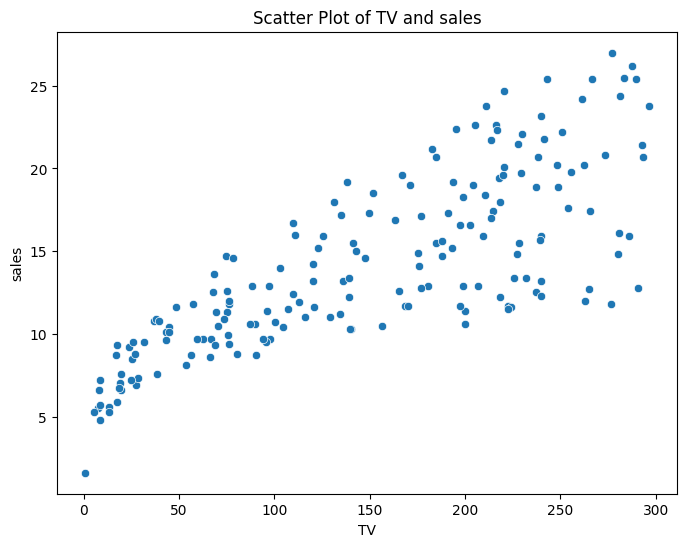

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='sales', data=df3)
plt.title('Scatter Plot of TV and sales')
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

Conducting the relationship analysis for all variables

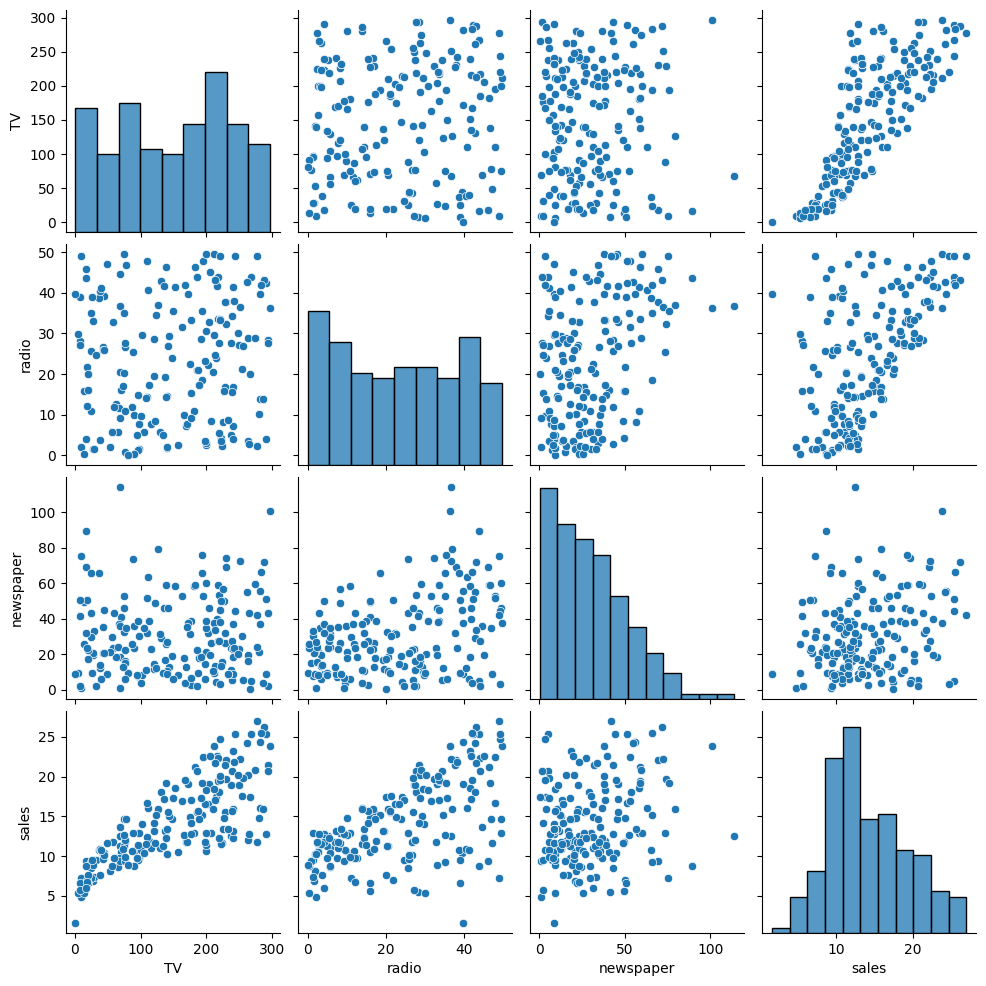

In [ ]:
sns.pairplot(df3, vars=['TV', 'radio', 'newspaper', 'sales'])
plt.show()

## Correlation Analysis (Linear Relationship)

Getting the matrix

In [44]:
correlation_matrix = df.corr()
correlation_matrix

,TV,radio,newspaper,sales
TV,1.000000,0.061308,0.024062,0.801281
radio,0.061308,1.000000,0.363217,0.541087
newspaper,0.024062,0.363217,1.000000,0.185570
sales,0.801281,0.541087,0.185570,1.000000


Visualizing the correlation (1 positive perfect linear relationship , -1 negative pefcect negative relationship)

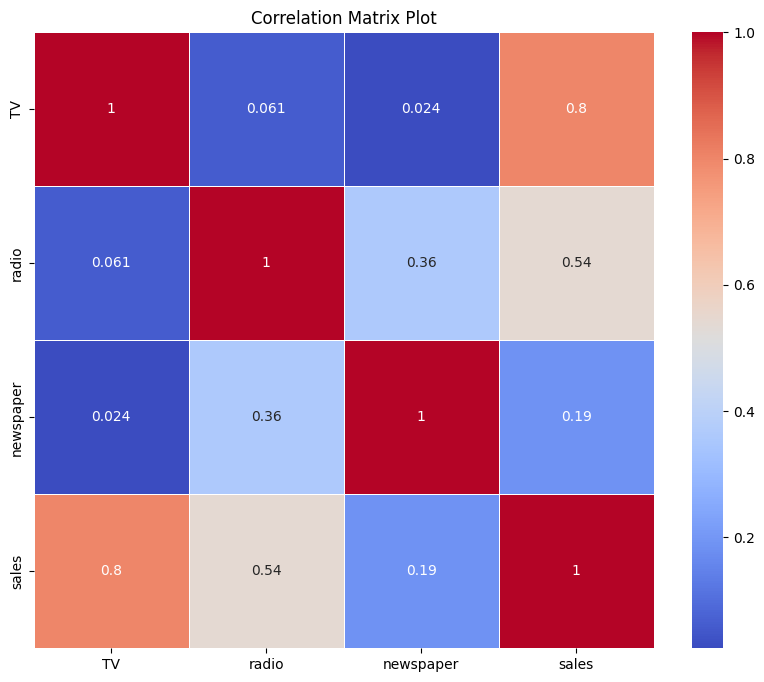

In [45]:
# Create a correlation matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Plot')
plt.show()

## Modeling

Install necessary packages

In [ ]:
#!pip install sklearn
#!pip insall statsmodels

Split first the dataset to train the model and to predict it. Train dataset actually will learn, and then it will try to find as correct as possible values on test data.

In [46]:
from sklearn.model_selection import train_test_split

# Assuming 'df3' is your DataFrame
X = df3[['TV', 'radio', 'newspaper']]  # Exogenous/Independent/predictors variables
y = df3['sales']  # Dependent variable

# Split the data into a training set and a test set (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train contain your training data, and X_test and y_test contain your test data.


In [47]:
X_train

,TV,radio,newspaper
65,69.0,9.3,0.9
67,139.3,14.5,10.2
31,112.9,17.4,38.6
12,23.8,35.1,65.9
41,177.0,33.4,38.7
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,94.2,4.9,8.1


## Linear Regression

Fit the model

In [49]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2575.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):                   3.42e-124
Time:                        16:18:39   Log-Likelihood:                         -311.56
No. Observations:                 146   AIC:                                      629.1
Df Residuals:                     143   BIC:                                      638.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Pay attention next important numbers.
1. Prob (F-Statistics) e-69 means it has 69 zeros before 4.71. This sign should be below 0.05. This indicates that your model is statistically signicifant (So your model is good)
2. Adj R-Squared. The higher it is the better it is. In a perfect world it is 1. This shows the percentage of your dependent variable (Sales) explained by your independent variables (TV, Radio, Newspaper)
3. P> |t| is the significance of the coefficents (Coefficents are the values associated to the variables ). It should be < 0.05. otherwise the coefficent is considered 0.
4. Coef (Coefficents) TV = 0.054 means a unit 1 increase in TV increases the Sales for 0.054. For instance if you increase your spending on TV ads from 10k to 11k your sales will be increased from 1000 to 1054.

## Predicting the future (We will see next time)

**Step 1**, take the values of dependent variables! The values we know. X_test <br>
**Step 2,** give it as input to the model that you have created with training values with X_train and y_train <br>
**Step 3,** Get the predicted values. y_test_predict <br>
Step 4, Calculate the MSE, MSE is basically doing the next sum(predicted  values- real values). If the predicted value is 5 and real value is 5 too that means you have perfectly predicted the future and your MSE is going to be 0 too. <br>

In [50]:
y_test_pred = ols_model.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred, squared=True)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE) on Test Data:", rmse)
print("R-squared (R2) on Test Data:", r2)

Mean Squared Error (MSE) on Test Data: 2.2491051639600217
R-squared (R2) on Test Data: 0.8202014933479665
